In [17]:
import json
with open("data/no_tax.json","r")as file:
    tax_json = json.load(file)
    

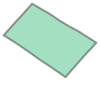

In [18]:
import arcpy
geom1 = arcpy.FromWKT(tax_json['data'][0][8])
geom1

In [19]:
import arcpy
new_row = []
for row in tax_json['data']:
    polygon = arcpy.FromWKT(row[8])
    new_row.append(polygon)

In [20]:
new_row

[<Polygon object at 0x19bacc5d490[0x19ba93b2730]>,
 <Polygon object at 0x19bacc40ad0[0x19ba93b0de0]>,
 <Polygon object at 0x19bacd08250[0x19ba14d1200]>,
 <Polygon object at 0x19bacd08710[0x19ba14d2b50]>,
 <Polygon object at 0x19bacd089d0[0x19ba14d2d90]>,
 <Polygon object at 0x19bacd08ad0[0x19ba14d1620]>,
 <Polygon object at 0x19baaf935d0[0x19ba14d0660]>,
 <Polygon object at 0x19bacd08bd0[0x19ba14d2760]>,
 <Polygon object at 0x19bacd08b50[0x19ba14d20a0]>,
 <Polygon object at 0x19bacd08910[0x19ba14d00c0]>,
 <Polygon object at 0x19bacd08c10[0x19ba14d05a0]>,
 <Polygon object at 0x19bacd08c90[0x19ba14d0ae0]>,
 <Polygon object at 0x19bacd08d10[0x19ba14d27f0]>,
 <Polygon object at 0x19bacd08d90[0x19ba14d3750]>,
 <Polygon object at 0x19bacd08e10[0x19ba14d3330]>,
 <Polygon object at 0x19bacd08ed0[0x19ba14d09f0]>,
 <Polygon object at 0x19bacd08f90[0x19ba14d0f00]>,
 <Polygon object at 0x19bacd09050[0x19ba14d3210]>,
 <Polygon object at 0x19baade90d0[0x19ba14d2160]>,
 <Polygon object at 0x19bacb868

In [21]:
import os
fcname = 'notax_fc.shp'
workspace = r'C:\Users\jemad\Documents\Documents\LSU\4th Semester_Fall 2025\GEOG 4057_GIS Programming'
fc_fullname = os.path.join(workspace,fcname)
if arcpy.Exists(fc_fullname):
    arcpy.management.Delete(fc_fullname)

arcpy.management.CreateFeatureclass(out_path=workspace,out_name=fcname,
                                    geometry_type='POLYGON',
                                    spatial_reference=4236)

<Result 'C:\\Users\\jemad\\Documents\\Documents\\LSU\\4th Semester_Fall 2025\\GEOG 4057_GIS Programming\\notax_fc.shp'>

In [22]:
desc = arcpy.da.Describe(fc_fullname)
for field in desc['fields']:
    print(field.name)

FID
Shape
Id


In [23]:
## add field names
fields = tax_json['meta']['view']['columns']
for field in fields:
    print(field['name'])
field_type = ['TEXT','TEXT','LONG','LONG','TEXT','LONG','TEXT','TEXT','TEXT','TEXT','TEXT','TEXT','TEXT']
field_names = []
for ind,field in enumerate(fields):
    name = field['name']
    if name == 'the_geom':
        continue
    if name.lower() == 'id':
        name = f'id_{ind}'
    max_len = min(10,len(name))
    name = name[:max_len]
    field_names.append(name)
field_names = [field.replace(" ","_") for field in field_names]
field_names = [field.replace(".","_") for field in field_names]
field_names

sid
id
position
created_at
created_meta
updated_at
updated_meta
meta
the_geom
OBJECTID
ID
Cluster Letter
Shape.STArea()
Shape.STLength()


['sid',
 'id_1',
 'position',
 'created_at',
 'created_me',
 'updated_at',
 'updated_me',
 'meta',
 'OBJECTID',
 'id_10',
 'Cluster_Le',
 'Shape_STAr',
 'Shape_STLe']

In [24]:
for ind,field_name in enumerate(field_names):
    arcpy.management.AddField(fc_fullname,
                              field_name=field_name,
                              field_type=field_type[ind])

In [25]:
field_names.append('SHAPE@')

In [26]:
field_names

['sid',
 'id_1',
 'position',
 'created_at',
 'created_me',
 'updated_at',
 'updated_me',
 'meta',
 'OBJECTID',
 'id_10',
 'Cluster_Le',
 'Shape_STAr',
 'Shape_STLe',
 'SHAPE@']

In [28]:
with arcpy.da.InsertCursor(fc_fullname, field_names=field_names) as cursor:
    for row in tax_json['data']:
        new_row_vals = []

        for ind, value in enumerate(row):
            if ind == 8:
                continue
            if value is None:
                value = ""
            new_row_vals.append(value)

        geometry = arcpy.FromWKT(row[8])  # correct geometry
        new_row_vals.append(geometry)

        cursor.insertRow(new_row_vals)
